# Project 4 Wrangle and Analyze Data

# Gathering Data

### Import  WeRateDogs Twitter Archive

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import tweepy
import json 

In [2]:
#import data
twitter_archive=pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Import Image Predictions

In [3]:
image_source=requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image-predictions.tsv', mode ='wb') as file:
    file.write(image_source.content)
    
image_data = pd.read_csv('image-predictions.tsv', sep='\t' )

image_data.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Import Tweet Counts using the Twitter API

In [5]:
#gather data from twitter API
#https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id
consumer_key = 'XxKsmx5mhdMvzkUhuPKqpTKG9'
consumer_secret = '3TumJ8unAIgEEY2ejiWqjoXYVflzB3K8u0J9sLy7jqjZ2FDo9p'
access_token = '2384175464-fOqrsei3UJFcAremjKCvmsMzxppDHlAu4HdQVEp'
access_secret = 'yjh8ZCR5Xa3kELNJDNPVISokiusZovyW9ivhEltMqvNyO'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, parser=tweepy.parsers.JSONParser(), wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True)


In [7]:
#Download Tweepy status object based on Tweet ID and store in list
tweets_list = []
missing_tweets=[]


for tweet_id in twitter_archive['tweet_id']: 
    try:
        data=api.get_status(tweet_id)
        tweets_list.append(data)
    except:
        missing_tweets.append(tweet_id)


Rate limit reached. Sleeping for: 449
Rate limit reached. Sleeping for: 437


In [8]:
print("The list of tweets" ,len(tweets_list))

The list of tweets 2329


In [9]:
# Store data to tweet_json.txt
with open('tweet_json.txt', mode = 'w') as file:
    json.dump(tweets_list, file)

In [10]:
# Loading the Twitter API data
count_data = pd.read_json('tweet_json.txt')

count_data = count_data[[ 'id', 'favorite_count', 'retweet_count']]

In [267]:
count_data.head(4)

,id,favorite_count,retweet_count
0,892420643555336193,36253,7718
1,892177421306343426,31269,5704
2,891815181378084864,23543,3781
3,891689557279858688,39545,7878


# Assesing Data

## Visual Assesment

In [11]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [269]:
image_data

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [270]:
count_data

,id,favorite_count,retweet_count
0,892420643555336193,36253,7718
1,892177421306343426,31269,5704
2,891815181378084864,23543,3781
3,891689557279858688,39545,7878
4,891327558926688256,37772,8492
...,...,...,...
2324,666049248165822465,96,39
2325,666044226329800704,272,132
2326,666033412701032449,112,41
2327,666029285002620928,121,42


## Programmatic Assesment

In [271]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [272]:
image_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [273]:
count_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2329 entries, 0 to 2328
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2329 non-null   int64
 1   favorite_count  2329 non-null   int64
 2   retweet_count   2329 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [274]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [275]:
image_data.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [276]:
count_data.describe()

,id,favorite_count,retweet_count
count,2.329000e+03,2329.000000,2329.000000
mean,7.419285e+17,7574.524259,2708.976814
std,6.824683e+16,11755.901574,4580.588758
min,6.660209e+17,0.000000,1.000000
25%,6.782786e+17,1318.000000,548.000000
50%,7.182469e+17,3292.000000,1269.000000
75%,7.986731e+17,9271.000000,3152.000000
max,8.924206e+17,156400.000000,77927.000000


In [12]:
twitter_archive['name'].value_counts()

None        745
a            55
Charlie      12
Cooper       11
Oliver       11
           ... 
Callie        1
Sunshine      1
Bertson       1
life          1
Tebow         1
Name: name, Length: 957, dtype: int64

In name column, there are illogical expression such as 'a' and 'None'.

In [13]:
np.sort(twitter_archive['name'].unique())

array(['Abby', 'Ace', 'Acro', 'Adele', 'Aiden', 'Aja', 'Akumi', 'Al',
       'Albert', 'Albus', 'Aldrick', 'Alejandro', 'Alexander',
       'Alexanderson', 'Alf', 'Alfie', 'Alfy', 'Alice', 'Amber',
       'Ambrose', 'Amy', 'Amélie', 'Anakin', 'Andru', 'Andy', 'Angel',
       'Anna', 'Anthony', 'Antony', 'Apollo', 'Aqua', 'Archie', 'Arlen',
       'Arlo', 'Arnie', 'Arnold', 'Arya', 'Ash', 'Asher', 'Ashleigh',
       'Aspen', 'Astrid', 'Atlas', 'Atticus', 'Aubie', 'Augie', 'Autumn',
       'Ava', 'Axel', 'Bailey', 'Baloo', 'Balto', 'Banditt', 'Banjo',
       'Barclay', 'Barney', 'Baron', 'Barry', 'Batdog', 'Bauer', 'Baxter',
       'Bayley', 'BeBe', 'Bear', 'Beau', 'Beckham', 'Beebop', 'Beemo',
       'Bell', 'Bella', 'Belle', 'Ben', 'Benedict', 'Benji', 'Benny',
       'Bentley', 'Berb', 'Berkeley', 'Bernie', 'Bert', 'Bertson',
       'Betty', 'Beya', 'Biden', 'Bilbo', 'Billl', 'Billy', 'Binky',
       'Birf', 'Bisquick', 'Blakely', 'Blanket', 'Blipson', 'Blitz',
       'Bloo', 'Bloop',

In [284]:
#Checking if there are some unexpected values in breed types 
twitter_archive['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [281]:
twitter_archive['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [282]:
twitter_archive['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [283]:
twitter_archive['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [91]:
#Checking if there are rows where dog type was not mentioned.
len(twitter_archive.loc[(twitter_archive['doggo']== 'None') & (twitter_archive['floofer']== 'None') & (twitter_archive['pupper']== 'None') & (twitter_archive['puppo']== 'None')])

1976

In [92]:
#Checking if there are rows in which more than two types of dog type were mentioned. 
len(twitter_archive.loc[(twitter_archive['doggo']== 'doggo') & (twitter_archive['floofer']== 'floofer')])

1

In [93]:
len(twitter_archive.loc[(twitter_archive['doggo']== 'doggo') & (twitter_archive['pupper']== 'pupper')])

12

In [94]:
len(twitter_archive.loc[(twitter_archive['doggo']== 'doggo') & (twitter_archive['puppo']== 'puppo')])

1

In [95]:
len(twitter_archive.loc[(twitter_archive['floofer']== 'floofer') & (twitter_archive['pupper']== 'pupper')])

0

In [96]:
len(twitter_archive.loc[(twitter_archive['floofer']== 'floofer') & (twitter_archive['puppo']== 'puppo')])

0

In [97]:
len(twitter_archive.loc[(twitter_archive['pupper']== 'pupper') & (twitter_archive['puppo']== 'puppo')])

0

In [65]:
#Check for the ranking related columns
twitter_archive.rating_denominator.sort_values()

313       0
2335      2
516       7
1576     10
1575     10
       ... 
1635    110
1779    120
1634    130
902     150
1120    170
Name: rating_denominator, Length: 2356, dtype: int64

In [66]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [67]:
twitter_archive.rating_numerator.sort_values()

315        0
1016       0
2335       1
2261       1
2338       1
        ... 
2074     420
188      420
189      666
313      960
979     1776
Name: rating_numerator, Length: 2356, dtype: int64

Check for duplicated tweets

In [68]:
sum(twitter_archive.duplicated())

0

In [69]:
sum(image_data.duplicated())

0

In [70]:
sum(count_data.duplicated())

0

Check for duplicated tweets by using tweet_id

In [58]:
twitter_archive[twitter_archive.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [59]:
image_data[image_data.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [60]:
count_data[count_data.id.duplicated()]

,id,favorite_count,retweet_count


In [78]:
#Checking the breed types
image_data.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
king_penguin            1
desktop_computer        1
African_crocodile       1
lion                    1
beach_wagon             1
Name: p1, Length: 378, dtype: int64

In [79]:
image_data.p2.value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
home_theater            1
cougar                  1
solar_dish              1
shower_curtain          1
lawn_mower              1
Name: p2, Length: 405, dtype: int64

Check for null data

In [100]:
image_data.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [87]:
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [88]:
image_data.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [89]:
count_data.isnull().sum()

id                0
favorite_count    0
retweet_count     0
dtype: int64

#### Quality
##### `twitter_archive` table


1. Timestamp should be datetime object and Tweet id should be string
2. Replies are included.
3. Retweets are included.
4. Full content of text is not visible
5. Numerator values with decimals in text are not correct in column 'rating_numerator'.
6. Ranking_numerator and ranking_denominator should be float.

##### `image_data` table
7. Tweet id should be string
8. Lower case/upper case differences for dog breed names

##### `count_data` table
9. Tweet id should be string
10. column name 'id' should be replaced by 'tweet_id'


#### Tidiness
##### `twitter_archive` table
1. There are multiple columns indications the type of a dog (doggo, floofer, pupper, puppo) 

##### `image_data` table
2. Breed_type column was added to see the dominant breed prediction

3. All databases are merged by using commn tweet ids'

# Cleaning Data

In [14]:
#First, create a copy of datasets
twitter_archive_clean = twitter_archive.copy()
image_data_clean = image_data.copy()
count_data_clean = count_data.copy()

###  Quality Issue 1, 6, 7 & 9
#### Define 
Correcting data types

#### Code

In [15]:
twitter_archive_clean['timestamp']=pd.to_datetime(twitter_archive_clean['timestamp'])
twitter_archive_clean.tweet_id=twitter_archive_clean.tweet_id.astype(str) 
image_data_clean.tweet_id=image_data_clean.tweet_id.astype(str) 
count_data_clean.id=count_data_clean.id.astype(str) 
twitter_archive_clean.rating_numerator=twitter_archive_clean.rating_numerator.astype(float)
twitter_archive_clean.rating_denominator =twitter_archive_clean.rating_denominator.astype(float)

#### Test

In [318]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   float64         

In [319]:
image_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [289]:
count_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2329 entries, 0 to 2328
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2329 non-null   object
 1   favorite_count  2329 non-null   int64 
 2   retweet_count   2329 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.7+ KB


### Quality Issue 2&3
#### Define 
Remove retweets and replies using in_reply_to_status_id or retweeted_status_id colums  and remove the related redundant columns such as in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp

#### Code

In [16]:
# Remove replies rows
replies = (~twitter_archive_clean.in_reply_to_status_id.isnull())
twitter_archive_clean=twitter_archive_clean[~replies]

In [17]:
# Remove retweet rows
retweets = (~twitter_archive_clean.retweeted_status_user_id.isnull())
twitter_archive_clean=twitter_archive_clean[~retweets]

In [18]:
# Remove reply and retweet related columns
twitter_archive_clean.drop(['in_reply_to_status_id', 
                    'in_reply_to_user_id', 
                    'retweeted_status_id', 
                    'retweeted_status_user_id', 
                    'retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [135]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   doggo               2097 non-null   object             
 9   floofer             2097 non-null   object             
 10  pupper              2097 non-null   object             
 11  puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2

In [148]:
len(twitter_archive)-len(twitter_archive_clean)

259

### Quality Issue 4
#### Define 
Show the full text in table.

In [294]:
#### Code

In [19]:
# Set column width to infinite 
pd.set_option('display.max_colwidth', None)

#### Test

In [207]:
twitter_archive_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1333,705442520700944385,2016-03-03 17:19:38+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cooper. He only wakes up to switch gears. 12/10 helpful af https://t.co/EEIkAGVY64,https://twitter.com/dog_rates/status/705442520700944385/photo/1,12,10,Cooper,None,None,None,None
2135,670061506722140161,2015-11-27 02:08:07+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Liam. He has a particular set of skills. He will look for you, he will find you, and he will kill you. 11/10 https://t.co/uQMFKv1vjn",https://twitter.com/dog_rates/status/670061506722140161/photo/1,11,10,Liam,None,None,None,None
886,759943073749200896,2016-08-01 02:45:22+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",Here's a wicked fast pupper. 12/10 camera could barely keep pup https://t.co/HtAR6gpUAu,https://vine.co/v/5AJm5pq7Kav,12,10,None,None,None,pupper,None
644,793180763617361921,2016-10-31 20:00:05+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Newt. He's a strawberry. 11/10 https://t.co/2VhmlwxA1Q,https://twitter.com/dog_rates/status/793180763617361921/photo/1,11,10,Newt,None,None,None,None
2345,666063827256086533,2015-11-16 01:22:45+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is the happiest dog you will ever see. Very committed owner. Nice couch. 10/10 https://t.co/RhUEAloehK,https://twitter.com/dog_rates/status/666063827256086533/photo/1,10,10,the,None,None,None,None


### Quality Issue 5
#### Define 
Fix the numerators in decimals in ranking_numerator column

#### Code

In [20]:
# Finding tweets that have numerator values with decimals in 'text' column
twitter_archive_clean[twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]

C:\Users\Alp\anaconda3\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,2017-07-08 00:28:19+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5.0,10.0,Bella,None,None,None,None
695,786709082849828864,2016-10-13 23:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,75.0,10.0,Logan,None,None,None,None
763,778027034220126208,2016-09-20 00:24:34+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27.0,10.0,Sophie,None,None,pupper,None
1712,680494726643068929,2015-12-25 21:06:00+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26.0,10.0,None,None,None,None,None


In [21]:
# Correcting specified four numerators for specific tweets
twitter_archive_clean.rating_numerator.loc[45]=13.5
twitter_archive_clean.rating_numerator.loc[695]=9.75
twitter_archive_clean.rating_numerator.loc[763]=11.27
twitter_archive_clean.rating_numerator.loc[1712]=11.26

C:\Users\Alp\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


#### Test

In [22]:
twitter_archive_clean[twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]

C:\Users\Alp\anaconda3\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,2017-07-08 00:28:19+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",13.50,10.0,Bella,None,None,None,None
695,786709082849828864,2016-10-13 23:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,9.75,10.0,Logan,None,None,None,None
763,778027034220126208,2016-09-20 00:24:34+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,11.27,10.0,Sophie,None,None,pupper,None
1712,680494726643068929,2015-12-25 21:06:00+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,11.26,10.0,None,None,None,None,None


### Quality Issue 8
#### Define 
Convert the dog breed type columns in image_data to lowercase

#### Code

In [23]:
image_data_clean['p1'] = image_data_clean['p1'].str.lower()
image_data_clean['p2'] = image_data_clean['p2'].str.lower()
image_data_clean['p3'] = image_data_clean['p3'].str.lower()

#### Test

In [306]:
image_data_clean['p1'].str.isupper().any()

False

In [198]:
image_data_clean['p2'].str.isupper().any()

False

In [199]:
image_data_clean[ 'p3'].str.isupper().any()

False

### Quality Issue 10
#### Define 
Replace column name 'id' to 'tweet_id' in count_data_clean

#### Code

In [24]:
count_data_clean= count_data_clean.rename(columns={'id': 'tweet_id'})

#### Test

In [308]:
count_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2329 entries, 0 to 2328
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2329 non-null   object
 1   favorite_count  2329 non-null   int64 
 2   retweet_count   2329 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.7+ KB


### Tidiness Issue 1 
#### Define 
Convert multiple dog type columns into one

#### Code

In [25]:
# Create and merge dog stages into one column
twitter_archive_clean['dog_types'] = twitter_archive_clean.text.str.extract('(doggo|floofer|pupper|puppo)', expand = True)

# Drop the unnecessary columns
twitter_archive_clean.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace = True)

#### Test 

In [324]:
twitter_archive_clean.dog_types.value_counts()

pupper     240
doggo       80
puppo       29
floofer      4
Name: dog_types, dtype: int64

### Tidiness Issue 2
#### Define 
Add a new column showing the dominant breed type

#### Code

In [26]:
# write a function that extracts the first dog breed prediction from the predictions DataFrame
breed=[]
for i in range(0, len(image_data_clean)):
    if image_data_clean['p1_dog'].loc[i, ]:
        breed_type=image_data_clean['p1'].loc[i, ]
    elif image_data_clean['p2_dog'].loc[i, ]:
        breed_type=image_data_clean['p2'].loc[i, ]
    elif image_data_clean['p3_dog'].loc[i, ]:
        breed_type=image_data_clean['p3'].loc[i, ]
    else:
        breed_type=np.NaN
    breed.append(breed_type)


In [27]:
#Add new column
image_data_clean['dominant_breed']=pd.DataFrame(breed)

#### Test

In [313]:
image_data_clean.head(8)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dominant_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True,welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,german_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True,miniature_pinscher
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,bernese_mountain_dog,0.651137,True,english_springer,0.263788,True,greater_swiss_mountain_dog,0.016199,True,bernese_mountain_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False,NaN
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,tibetan_mastiff,0.058279,True,fur_coat,0.054449,False,chow


### Tidiness Issue 3 
#### Define 
Merge all datasets based on tweet_id

#### Code

In [28]:
# merge twitter_archive_clean with predictions_clean
all_data = pd.merge(twitter_archive_clean, image_data_clean, how = 'inner', on = ['tweet_id']).copy()

# merge complete_df with twitter_add_info_clean
all_data= pd.merge(all_data, count_data_clean, how = 'inner', on = ['tweet_id']).copy()

# save the complete_df as csv
all_data.to_csv('complete_df.csv', encoding = 'utf-8')

all_data_clean = all_data.copy()

#### Test

In [29]:
all_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1962 entries, 0 to 1961
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1962 non-null   object             
 1   timestamp           1962 non-null   datetime64[ns, UTC]
 2   source              1962 non-null   object             
 3   text                1962 non-null   object             
 4   expanded_urls       1962 non-null   object             
 5   rating_numerator    1962 non-null   float64            
 6   rating_denominator  1962 non-null   float64            
 7   name                1962 non-null   object             
 8   dog_types           320 non-null    object             
 9   jpg_url             1962 non-null   object             
 10  img_num             1962 non-null   int64              
 11  p1                  1962 non-null   object             
 12  p1_conf             1962 non-null 

In [338]:
# checking for duplicates
sum(all_data_clean['tweet_id'].duplicated())

0

# Store Data

In [30]:
# Create a csv file
all_data_clean.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

# Analyzing & Visualizing Data

In [31]:
df = pd.read_csv('twitter_archive_master.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1962 entries, 0 to 1961
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1962 non-null   int64  
 1   timestamp           1962 non-null   object 
 2   source              1962 non-null   object 
 3   text                1962 non-null   object 
 4   expanded_urls       1962 non-null   object 
 5   rating_numerator    1962 non-null   float64
 6   rating_denominator  1962 non-null   float64
 7   name                1962 non-null   object 
 8   dog_types           320 non-null    object 
 9   jpg_url             1962 non-null   object 
 10  img_num             1962 non-null   int64  
 11  p1                  1962 non-null   object 
 12  p1_conf             1962 non-null   float64
 13  p1_dog              1962 non-null   bool   
 14  p2                  1962 non-null   object 
 15  p2_conf             1962 non-null   float64
 16  p2_dog

In [4]:
df.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_types,jpg_url,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dominant_breed,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,False,bagel,0.085851,False,banana,0.076110,False,NaN,36253,7718
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,True,Pekinese,0.090647,True,papillon,0.068957,True,Chihuahua,31269,5704
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,True,malamute,0.078253,True,kelpie,0.031379,True,Chihuahua,23543,3781
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,Labrador_retriever,39545,7878
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,basset,37772,8492


In [343]:
df.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,favorite_count,retweet_count
count,1.962000e+03,1962.000000,1962.000000,1962.000000,1962.000000,1.962000e+03,1.962000e+03,1962.000000,1962.000000
mean,7.358338e+17,12.224261,10.479613,1.202345,0.593708,1.346920e-01,6.032210e-02,8340.057594,2476.560652
std,6.746121e+16,41.729388,6.868907,0.559863,0.272182,1.009773e-01,5.098254e-02,12257.043166,4424.150185
min,6.660209e+17,0.000000,2.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,71.000000,11.000000
25%,6.758285e+17,10.000000,10.000000,1.000000,0.362656,5.351907e-02,1.619283e-02,1784.250000,553.000000
50%,7.087246e+17,11.000000,10.000000,1.000000,0.587222,1.174550e-01,4.950530e-02,3773.000000,1195.500000
75%,7.877873e+17,12.000000,10.000000,1.000000,0.846896,1.955693e-01,9.166433e-02,10383.000000,2832.500000
max,8.924206e+17,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,156400.000000,77927.000000


## What are the most common breed types?

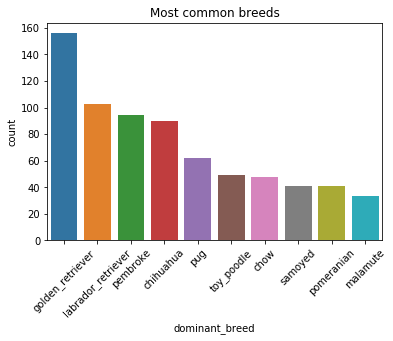

<Figure size 1080x3600 with 0 Axes>

In [35]:
chart=sns.countplot(data=df, x='dominant_breed', order=df.dominant_breed.value_counts().iloc[:10].index)
plt.title('Most common breeds', size=12)
plt.figure(figsize=(15,50))
chart.set_xticklabels(chart.get_xticklabels(), rotation=45);

plt.savefig('common_breeds.png', bbox_inches='tight');

## Are there any correlated variables?

In [76]:
#Create a correlation matrix
corrMatrix = df.corr()
print (corrMatrix)

                    tweet_id  rating_numerator  rating_denominator   img_num  \
tweet_id            1.000000          0.024894           -0.017462  0.215549   
rating_numerator    0.024894          1.000000            0.185722 -0.003166   
rating_denominator -0.017462          0.185722            1.000000 -0.017027   
img_num             0.215549         -0.003166           -0.017027  1.000000   
p1_conf             0.102448         -0.006952            0.008258  0.203213   
p1_dog              0.120246         -0.030793           -0.004635  0.032827   
p2_conf            -0.001173         -0.019769           -0.032085 -0.156738   
p2_dog              0.124593         -0.036155           -0.005913  0.057499   
p3_conf            -0.044794         -0.004263            0.006657 -0.138199   
p3_dog              0.096626         -0.030880           -0.000334  0.059669   
favorite_count      0.610860          0.016740           -0.024392  0.130806   
retweet_count       0.383770          0.

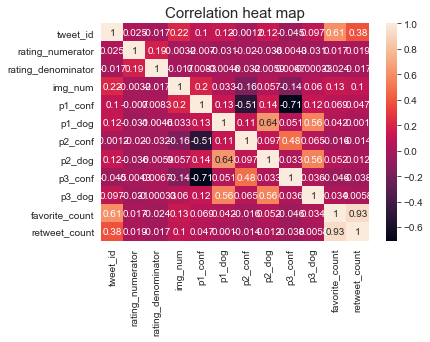

In [93]:
#Create a heat map to detect highly correlated variables
sns.heatmap(corrMatrix, annot=True)
plt.title('Correlation heat map', size=15);
plt.savefig('correlation_map');

## At which stage of the dog is the most commonly tweeted?

In [77]:
df.dog_types.value_counts()

pupper     220
doggo       70
puppo       27
floofer      3
Name: dog_types, dtype: int64

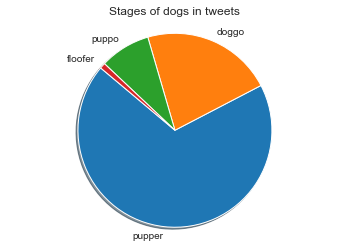

In [98]:
#Plot a pie chart to see the results clearly 
plt.pie(df.dog_types.value_counts(), labels=df.dog_types.value_counts().index,  shadow=True, startangle=140)
plt.title('Stages of dogs in tweets')
plt.axis('equal')
plt.savefig('stages_of_dogs')
plt.show();

## What is the relation between retweet and favourite counts?

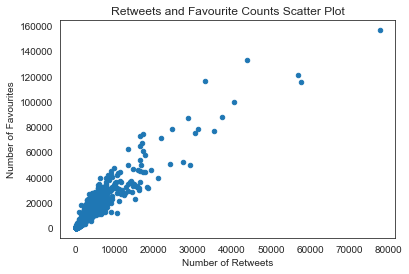

In [100]:
#Plot a scatter matrix to see the relation 
df.plot(x='retweet_count', y='favorite_count', kind='scatter')
plt.xlabel('Number of Retweets')
plt.ylabel('Number of Favourites')
plt.title('Retweets and Favourite Counts Scatter Plot')
fig = plt.gcf()
fig.savefig('retweet_favourite');

## What are the most common dog names? 

In [80]:
df.name.value_counts()

None        523
a            55
Cooper       10
Oliver       10
Charlie      10
           ... 
Rumpole       1
Josep         1
Cecil         1
Meatball      1
Crumpet       1
Name: name, Length: 932, dtype: int64

In [6]:
#Since 'None and 'a' are not names, ignore them 
df_drop=df[(df.name != 'None')&(df.name != 'a')] 
df_drop.name.value_counts()

Cooper      10
Oliver      10
Charlie     10
Penny        9
Tucker       9
            ..
Chuq         1
Richie       1
Berkeley     1
Vince        1
Kanu         1
Name: name, Length: 930, dtype: int64

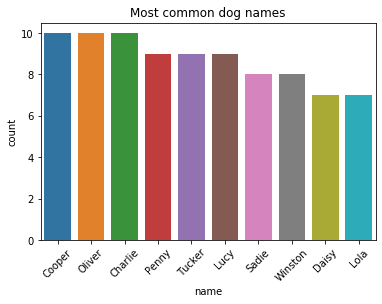

<Figure size 1080x3600 with 0 Axes>

In [9]:
#Create a bar chart to see top 10 frequent names
sns.countplot(data=df_drop, x='name', order=df_drop.name.value_counts().iloc[:10].index).set_xticklabels(chart.get_xticklabels(), rotation=45);
plt.title('Most common dog names', size=12)
plt.figure(figsize=(15,50))
plt.savefig('common_dog_names')